***

<center>
<h1 style="text-align:center">Lab 2: Basics of Statistical Analysis in Python.</h1>
<h3 style="text-align:center">DV1604 Interactive Laboratories.</h3>
<h3 style="text-align:center">Blekinge Institute of Technology.</h3>
<h3 style="text-align:center">2024.</h3>
<h6 style="text-align:center">Designed and developed by Diego Navarro Tek.Lic., modified by Milena Angelova PhD 2024.</h6>
<img src="bth.png" width="100" height="100">
</center>

***

### Description.

The following document presents some of the common techniques used to explore and analyze different variables in a data set, and how to conduct a hypothesis testing using Python and the Jupyter Notebook. It simulates a research exercise in which a research question is proposed, and set of hypotheses are evaluated based on a dataset published by the United Nations (UN).

The topics that will be covered int this lab are:

- Importing and creating datasets from external files.
- Plotting datasets.
- Checking for dataset completeness.
- Data distributions.
- Regressions.
- Statistical significance test.

***

## 1. Research Questions and Hypotheses.

Every year the UN Sustainable Development Solutions Network analyses the happiness levels in several countries around the world, based on several indicators. In particular, this analysis reviews the [Global Happiness Index dataset](https://www.kaggle.com/unsdsn/world-happiness) for the year 2019.

Based on that information, this analysis proposes a couple research questions:
    
**1. What relationship may exist between the Happiness Index Score, and the GDP and the healthy life expectancy indicators of the surveyed countries in 2019?** 

To address this research question, the following hypotheses are proposed:
    
- H1: Healthy life expectancy and GDP ***will have a directly proportional relationship*** with the happiness score.
- H0: Healthy life expectancy and GDP ***will not have a directly proportional relationship*** with the happiness score.


**2. How does the Global Happyness Index variate between the countries with low, average, and high happiness scores?**

For this research question we will propose another set of hypothesis:

- H1: The values of high, average, and low countries ***are significantly different*** between one another.
- H0: The values of high, average, and low countries ***are not significantly different*** between one another.

***

## 2. Libraries.

The libraries that are used in this exercise are:

1. [Matplotlib](https://matplotlib.org/): A library for plotting graphs and data visualization (covered in lab 1).
2. [Numpy](https://numpy.org/): A library to compute large multidimensional arrays and matrixes. Also compiles a broad set of high-level mathematical functions.
3. [Pandas](https://pandas.pydata.org/): A library for data manipulation and dataset analysis.
4. [Scipy](https://www.scipy.org/): Comprehensive library for numerical integration, interpolation, optimization, linear algebra, and statistics.

We now import all the different libraries that are needed for this exercise, making sure to run the `%matplotlib inline` magic command before the libraries themselves:

In [2]:
%matplotlib inline

# Importing pandas
import pandas as pd

#Importing Matplotlib
import matplotlib.pyplot as mpl

#Importing Numpy
import numpy as np

#Importing Scipy
import scipy.stats as scp

C:\Users\Anton\AppData\Local\Temp\ipykernel_2440\241513505.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


***

## 3. Importing and Reviewing Data Sets.

To import a dataset into our Python application, we can use several different commands depending on the type of file we try to import. For this example, we will be working with a *CSV* (Comma Separated Values) file. However, pandas support a wide variety of formats to use as an input of data.

> 📚 **Additional Material**: For more information regarding the input options supported by Pandas check the [Input/Output](https://pandas.pydata.org/docs/reference/io.html) documentation.

To manipulate the Global Happiness Index dataset, we will use a *Data Frame*. Data Frames are two-dimensional data structures, that specialize in the handling of tabular data. For this example, we will load the CSV file into a variable using the `pd.read_csv` command, specifying the name of the file between quotation marks `""`, and the character used as a delimiter to separate the file into columns in the `sep` parameter. 

> 📚 **Additional Material**: For more information about Data Frames, check the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation.

To visualize the dataset we can simply type the name of the variable to get an overview, or we can use the command `head()` from Pandas, specifying the number of rows we want to visualize.

> 💡 **Tip**: The `head()` command can visualize up to 60 data points in a dataset.

In [3]:
# visualize the dataset
# add your code here
data = pd.read_csv("C:/Skola/Github Repon/DV1604_G7/Lab2/2019.csv")
print(data.head(), sep= "")

   Overall_rank Country_or_region  Score  GDP_per_capita  Social_support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy_life_expectancy  Freedom_to_make_life_choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions_of_corruption  
0                      0.393  
1                      0.410  
2                

In [4]:
# visualize the first 20 rows
# add your code here

print(data[:21], sep= "")

    Overall_rank     Country_or_region  Score  GDP_per_capita  Social_support  \
0              1               Finland  7.769           1.340           1.587   
1              2               Denmark  7.600           1.383           1.573   
2              3                Norway  7.554           1.488           1.582   
3              4               Iceland  7.494           1.380           1.624   
4              5           Netherlands  7.488           1.396           1.522   
5              6           Switzerland  7.480           1.452           1.526   
6              7                Sweden  7.343           1.387           1.487   
7              8           New Zealand  7.307           1.303           1.557   
8              9                Canada  7.278           1.365           1.505   
9             10               Austria  7.246           1.376           1.475   
10            11             Australia  7.228           1.372           1.548   
11            12            

An additional method to retrieve the number of rows and columns (in that respective order) in our dataset, is the command `happydf.shape`:

In [5]:
# retrieve the number of rows and columns
# add your code here
print(data.shape)

(156, 9)


Finally, to complete the review of our data set, we must verify **data completeness**. We can do this in Pandas by using the command `happydf.isnull().values.any()`. The command will review all the columns in the data set and will return `True` if there is any missing value in any of them. A `False` result, on the other hand, means that there are no null values in the dataset and that the data we have is complete.

> 📚 **Additional Material**: For  more information, check the [isnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) and the [values.any()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) documentation.

In [6]:
# check if there are missing values
# add your code here
print(data.isnull().values.any()) 


False


***

## 4. Plotting data in a Data Frame 

To start analyzing our data, we must first find a way of comprehensively visualize the most relevant data that may contribute to answer the proposed research question. 

First, we will visualize the ***Global Happiness Index Score*** data.

> 💡 **Tip**: when visualizing large datasets, make sure to take advange of the medium in which the visualization is going to be displayed, and adjust the figure size accordingly. Remember *readibility* is a top priority when visualizing data.

In [7]:
# visualize Global Happiness Index Score data
# add the code here

plot_data = data[["Overall_rank" ,"Country_or_region", "Score"]]
print(plot_data)

     Overall_rank         Country_or_region  Score
0               1                   Finland  7.769
1               2                   Denmark  7.600
2               3                    Norway  7.554
3               4                   Iceland  7.494
4               5               Netherlands  7.488
..            ...                       ...    ...
151           152                    Rwanda  3.334
152           153                  Tanzania  3.231
153           154               Afghanistan  3.203
154           155  Central African Republic  3.083
155           156               South Sudan  2.853

[156 rows x 3 columns]


We can further explore the data stored in the dataset by visualizing different properties of the data that may be relevant to address the research question. For example the *data distribution* with a box plot, or *frequencies* with a histogram:

In [8]:
# visualize the data distribution of Score
# add the code here


For the histogram, we can tell Matplotlib how many intervals we wish the data to be divided in. The `ax.hist` command will then automatically calculate the number of values that are repeated within each interval. In this example, we divide the data into `10` intervals, and we modify the width of the bar using the `rwidth` parameter.

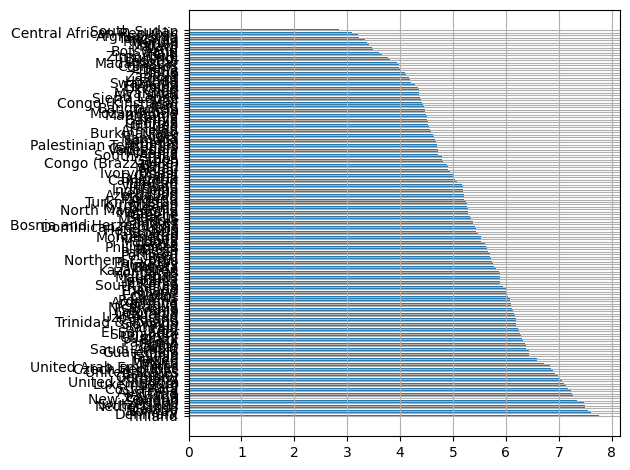

In [9]:
# create a histogram of Score data
# add the code here
fig = mpl.figure()
ax = fig.add_subplot()
y_lables = data["Country_or_region"]
x_data = data["Score"]
ax.barh(y_lables, x_data)
ax.grid()
fig.tight_layout()

Now that we are able to visualize our dataset, we can start comapring different categorical variables against one another, and gather evidence to accept or reject our hypothesis.

***

## 5. Regressions

For the next example, we will compare the ***Global Happiness Index Score*** agains the ***GDP*** of each country.

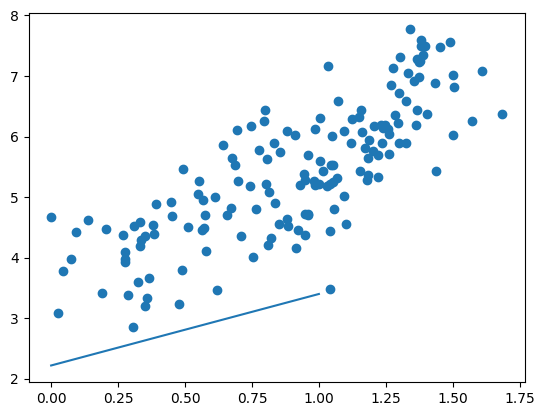

In [10]:
# compare Global Happiness Index Score vs. GDP of each country
# add the code here
fig = mpl.figure()
ax = fig.add_subplot()
ax.scatter(data["GDP_per_capita"], data["Score"])


The scatter plot suggests a *directly proportional* relationship between GDP and the Happiness Score: the higher the GDP of the country, the higher the Happiness Score.

To highlight this relationship, we can calculate a **linear regression** and plot it together with the scatter plot. To do this we will use the `np.polyfit` method from Numpy, and store the results in `data_linreg`. As parameters for `np.polyfit` we indicate the data from where the regression is calculated (GDP and Happiness Score), and the level of the regression (since we are focusing on a linear regression, the level is `1`).

> 📚 **Additional Material**: For more information, review the [polyfit()](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) documentation.

If we then print `data_linreg`, we see the values of the coefficients (the *slope* and the *intercept* respectively) of the linear model $y = a + bx$.

[2.218148   3.39934518]


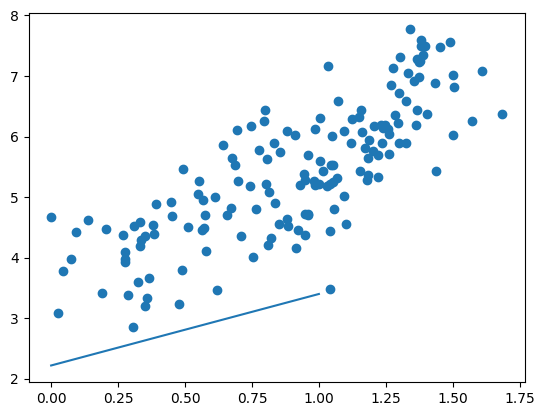

In [36]:
# calculate the linear regression
# add your code here
fig = mpl.figure()
ax = fig.add_subplot()
x, y = data["GDP_per_capita"], data["Score"]
ax.scatter(x,y)
data_linreg = np.polyfit(x,y, 1)
print(data_linreg)
ax.plot(data_linreg)        

If we, for any reason, would like to save the regression data in the dataset, we will need to store these data in a unidimensional structure, and then insert it as a column in our data set.

To store the regression data in a unidimensional structure, we can use the `np.poly1d` function from Numpy. In this example, we use `Linreg` to store this data.

Finally, we can insert `Linreg` as a column in our dataset using the `happy.insert` command from Pandas. As paremeters, we indicate pandas after which column the data should be inserted (`4` in this example), the name of the column (`'Lin_Reg_Col'`), and finally the regression data (`Linreg(happyde.GDP_per_Capita)`).

> 📚 **Additional Material**: For more information, review the [poly1d()](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) and the [insert](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html) documentation.

In [12]:
# insert the linear regression results as a column
# add your code here

In [13]:
# print the dataset
# add your code here

With the regression data calculated and stored, we simply need to plot the variable `data_linreg` together with the data from the previous scatter plot. To do this, we will add 2 variables to our previous plot. The variable `lr` will store the data from the function `np.polyval` from Numpy, which evaluates the values of a polynomial expression, using the `data_linreg` variable. Additionally, to establish a smooth plotting, we will create linear space for the X axis using `np.linspace`, and store it in `xp`.

> 📚 **Additional Material**: For more information, check the [polyval()](https://numpy.org/doc/stable/reference/generated/numpy.polyval.html) and the [linspace()](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) documentation.

In [14]:
# plot the linear regression data
# add your code here

Now we have a look at other categorical variables in the dataset. We will plot now ***Healthy Life Expectancy*** against the ***Happiness Index Score***, and analyze the type of relationship between them.

In [15]:
# plot a different graph between columns Healthy Life Expectancy vs. Happiness Index Score
# add the code here

For Healthy Life Expectancy and the Index Score, even if the data suggest a directly proportional relationship between these variables, it seems that the rate at which the score grows increases when the life expectancy surpasses $0.6$. Therefore, in this scenario, a polynomial regression will offer a more accurate representation of this data behavior than a linear regression.

Given this, we calculate a second-level polynomial regression using `np.polyfit`.

In [16]:
# calculate a second-level polynomial regression
# add your code here

If we print the result from the `np.polyfit` function we obtain the four coeficients for the cubic model
$y= a + bx + cx^{2}$.

We now repeat the same process we did in our lineal model example to plot the polynomial regression.

In [17]:
# plot the polinomial regression
# add your code here

> 💡 **Tip**: Regressions are not only a statistical method. Regressions are also commonly used in machine learning, in the implementation of classifiers. In that area, the challenge is to design a regression model (called hypothesis) that can differentiate positives and negatives inputs. Put special attention to this technique! 🤖

***

## 6. Statistical Significance Tests.

We have shown graphically the kind of relationship that the ***Global Happiness Index Score*** has with both, the ***Healthy Life Expectancy*** and the ***GDP***. However, we must conduct a statistical test to be certain that any assumptions or conclusions we present are significant.

To find an appropriate statistical test, we can refer to the following chart that was shared in the slides from Lecture 3:

<img src="tests.png" width="800" height="800">

From this chart, we can see that the *Product-Moment Correlation*, better known as the ***Pearson Correlation Coefficient***, is one suitable test to evaluate the degree of the relationship between the ***Global Happiness Index Score***, and the ***GDP*** and the ***Healthy Life Expectancy***.

To implement a Pearson Correlation Coefficient test, we use the SciPy method `scp.stats.pearsonr`, sending as parameters the data from `happydf.Score`, `happydf.GDP_per_capita`, and `happydf.Healthy_life_expectancy`. The method `scp.stats.pearsonr` returns a tuple with two values: the *correlation coefficient $r$*, and the *p-value* respectively. In this case, we are interested in the correlation coefficient $r$.

> 📚 **Additional Material**: For more information, review the [scp.stats.pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) documentation.

In [18]:
# evaluate the degree of the relationship between the Global Happiness Index Score, GDP, and Healthy Life Expectancy
# add your code here

> 💡 **Tip**: The Pearson Correlation Coefficient $r$ is a value between `0` and `1`, where `0` represents no linear correlation at all, and `1` represents a perfect linear correlation (all points fit within a single straight line). It is considered that $r$ results equal or greater than `0.8` show a strong linear relationship between the evaluated samples.

Now, to address the second research question, we will need to create intervals to define low, average, and high Scores in the Global Happiness Index. Let's plot this variable:

In [19]:
# plot Country Rank vs. Score
# add your code here

We can now see that there are 2 points in which there is a change of slope on the plot for the Scores in the dataset: one around **4.3**, and another around **6.5**. Once we have identified these intervals, we can use them to determine high, average, and low values in our data.

In [20]:
# find all scores that are more than or equal to 4.3
# add your code here

In [21]:
# find all scores that are less than 6.5
# add your code here

In [22]:
# find all scores that are more than or equal to 4.3 and less than 6.5
# add your code here

In order to apply a statistical test that measures if the differences between two or more variables are significant, we must evaluate two things: 
    
1. The factors and levels of factors that we are evaluating.
2. The ANOVA assumptions.

In this example, we have **1 factor (Score)** and **3 levels for that factor (low scores, average scores, and high scores)**.

The ANOVA assumptions area set of premises that, if met, will allow us to apply parametric tests in our hypothesis testing. The ANOVA assumptions are:

1. Independence: every data point is sampled independently (the data set fulfills that).
2. Normality: data is normally distributed. When a dataset has 30 or more data points, you can assume that the data is normally distributed thanks to the central limit theorem. Otherwise, you can test the normality of your data by performing a Shapiro-Wilk test (we have 156 data points we assume normality in this case).
3. Homoscedasticity: variance among data samples is similar. We can test for homoscedasticity by applying the [Levene’s test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or by using the [Bartlett test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html).

> 📚 **Additional Material**: For a more detailed description of the previously mentioned methods, review the [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html?highlight=shapiro#scipy.stats.shapiro), the [scipy.stats.levene](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html?highlight=levene#scipy.stats.levene), and the [scipy.stats.bartlett](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html) documentation.

Since assumptions 1 and 2 are met, let's test for homoscedasticity using `scp.levene`. The test will return 2 values: an *l-statistic value*, and a *p-value*. In this case, we are interested in the p-value. Specifically, if the **p-value is greater than 0.05**, since it will represent that the variance between the data samples is not significantly different.

In [23]:
#Saving results in independent unidimensional structures
# add your code here

Since the p-value is **lesser** than 0.05, it means **that there is a statistically significant difference in the variance of the 3 samples** from the Global Happinnes Index score. Therefore, this ANOVA assumption is not met and we **can not apply a parametric test**.

To have a better perspective of the non-parametric test suitable for this scenario, we can refer to the table shared in the slides from Lecture 3:

<img src="tests2.png" width="800" height="800">

Knowing that we have 1 factor, 3 levels in the factor, and we must apply a non-parametric test, we have now to select the best suiting test for our example. In this case, the *Kruskal-Wallis* test or the *Friedman* test are good options to test our hypothesis. In this case, we use `scp.kurskal` to carry out the statistical test.

> 📚 **Additional Material**: For more details, check the [scp.stats.kurskal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html) documentation.

In [24]:
# add your code here

***

### Conclusion

Based on the previous analysis we can now present the final answers to our research questions.

#### Question 1
What relationship may exist between the Happiness Index Score and the GDP and life expectancy of the survey countries in 2019? 

Based on the graphical evidence gathered through the regression analysis, we may accept H1 and reject H0, since life expectancy and GDP clearly **expose a directly proportional relationship with the happiness score**. However, if we care for linearity and we take into account the results from the Pearson correlation coefficient *r*, we may not be able to do this since the threshold of 0.8 was not surprassed by either variable.

#### Question 2
How does the Global Happyness Index variate between the countries with low, average, and high happiness scores?

Based on the plot from the Scores, we identify 2 points in which values increased noticeably. We used those points to determine evaluation intervals for the Score variable. We conducted an ANOVA assumption analysis and selected a Kruskal-Wallis test to test our hypothesis, accepting H1 and rejecting H0:
*The values of high, average, and low countries ***are significantly different*** between one another*.

***

This concludes Lab II. 🥳 🎉

When combined together, Matplotlib, Pandas, Numpy, and Scypy become a very comprehensive and powerful set of tools for data science and machine learning applications. Make sure to familiarize  yourself with those libraries, and to take advantage  of all their potential! 🤓

> 📚 **Additional Material**: For a complete overview of these libraries, check the [Pandas official documentation](https://pandas.pydata.org/docs/), the [Numpy official documentation](https://numpy.org/doc/stable/), and the [Scipy official documentation](https://docs.scipy.org/doc/scipy/).

***